In [8]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


SVM 

Number of instances in training set: 116
Number of instances in validation set: 78
Accuracy: 94.87%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.95      0.95      0.95        39

    accuracy                           0.95        78
   macro avg       0.95      0.95      0.95        78
weighted avg       0.95      0.95      0.95        78



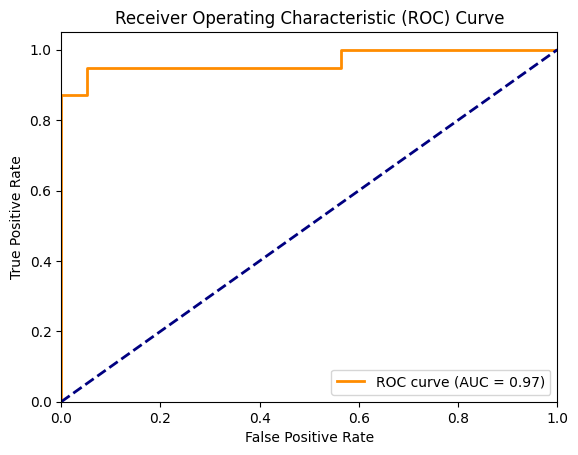

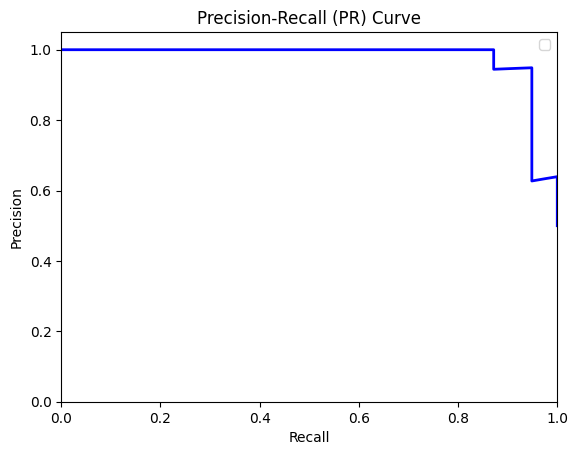

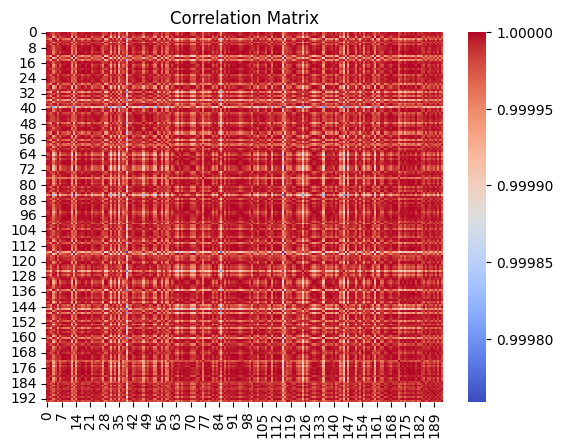

Confusion Matrix:
[[37  2]
 [ 2 37]]


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
import seaborn as sns

# Load the dataset from a CSV file (replace 'your_data.csv' with the name of your CSV file)
data = pd.read_excel('/content/drive/MyDrive/xls/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Print the number of instances in the training and validation sets
print("Number of instances in training set: {}".format(len(X_train)))
print("Number of instances in validation set: {}".format(len(X_test)))


# Preprocess the data by standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVM classifier with a linear kernel
svm_classifier = SVC(kernel='rbf', C=5.1,gamma=0.501, probability=True)

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate the probabilities for the ROC curve and PR curve
y_probs = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve and the AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Calculate the PR curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Plot the PR curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)#, label='PR curve (AP = %0.2f)' % average_precision
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="upper right")
plt.show()



# Print the correlation matrix
plt.figure()
corr_matrix = np.corrcoef(X_test, X_train)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)




In [ ]:
X_train[0]

15

In [ ]:
X_train_scaled

array([[ 0.11246531,  0.11246531,  1.16182665, ...,  1.19040831,
         1.13426342, -1.13426342],
       [-0.33238498, -0.33238498, -0.51235834, ..., -0.40290743,
        -0.5819245 ,  0.5819245 ],
       [-0.37093868, -0.37093868, -0.51235834, ..., -0.40290743,
        -0.63404792,  0.63404792],
       ...,
       [ 2.40789286,  2.40789286,  2.83601164, ..., -0.40290743,
         0.78419919, -0.78419919],
       [-0.35314467, -0.35314467, -0.51235834, ..., -0.40290743,
        -0.46908695,  0.46908695],
       [ 0.52024475,  0.52024475, -0.51235834, ..., -0.40290743,
        -0.61984664,  0.61984664]])

In [ ]:
X_test

array([[1.74600000e+03, 2.61900000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 3.75009383e-01, 6.24990617e-01],
       [1.32600000e+03, 1.98900000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 3.67475069e-01, 6.32524931e-01],
       [1.66400000e+03, 2.49600000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 3.64396027e-01, 6.35603973e-01],
       ...,
       [1.69000000e+03, 2.53500000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 3.56971198e-01, 6.43028802e-01],
       [3.77400000e+03, 5.66100000e+03, 0.00000000e+00, ...,
        1.00000000e+00, 5.92789683e-01, 4.07210317e-01],
       [1.67400000e+03, 2.51100000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 3.90530168e-01, 6.09469832e-01]])

In [ ]:
X_test_scaled

array([[-0.32200514, -0.32200514, -0.51235834, ..., -0.40290743,
        -0.55514507,  0.55514507],
       [-0.63340035, -0.63340035, -0.51235834, ..., -0.40290743,
        -0.63298015,  0.63298015],
       [-0.38280135, -0.38280135, -0.51235834, ..., -0.40290743,
        -0.66478895,  0.66478895],
       ...,
       [-0.36352451, -0.36352451, -0.51235834, ..., -0.40290743,
        -0.74149297,  0.74149297],
       [ 1.18158887,  1.18158887, -0.51235834, ...,  0.12819782,
         1.69468789, -1.69468789],
       [-0.37538718, -0.37538718, -0.51235834, ..., -0.40290743,
        -0.39480378,  0.39480378]])

In [7]:
data = pd.read_csv('/content/drive/MyDrive/xls/raw_independent_set_AA9_Final.csv')

X_inde = data.iloc[:, :-1].values
y_inde = data.iloc[:, -1].values


X_inde_test_scaled = scaler.transform(X_inde)

Y_pred = svm_classifier.predict(X_inde_test_scaled)


accuracy = accuracy_score(y_inde, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
report = classification_report(y_inde, Y_pred)
print(report)

Accuracy: 44.72%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.45      0.62       729

    accuracy                           0.45       729
   macro avg       0.50      0.22      0.31       729
weighted avg       1.00      0.45      0.62       729



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
data = pd.read_csv('/content/drive/MyDrive/xls/raw_independent_set_AA16_Final.csv')

X_inde = data.iloc[:, :-1].values
y_inde = data.iloc[:, -1].values


X_inde_test_scaled = scaler.transform(X_inde)

Y_pred = svm_classifier.predict(X_inde_test_scaled)


accuracy = accuracy_score(y_inde, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
report = classification_report(y_inde, Y_pred)
print(report)

Accuracy: 24.56%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.25      0.39        57

    accuracy                           0.25        57
   macro avg       0.50      0.12      0.20        57
weighted avg       1.00      0.25      0.39        57



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
data = pd.read_csv('/content/drive/MyDrive/xls/raw_independent_set_AA11_Final.csv')

X_inde = data.iloc[:, :-1].values
y_inde = data.iloc[:, -1].values


X_inde_test_scaled = scaler.transform(X_inde)

Y_pred = svm_classifier.predict(X_inde_test_scaled)


accuracy = accuracy_score(y_inde, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
report = classification_report(y_inde, Y_pred)
print(report)

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [5]:
y_inde

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(
X_train_scaled[0])

[ 0.11246531  0.11246531  1.16182665  0.13848107 -0.13773618  0.10487066
  0.10427559 -0.15281873  0.10374704 -0.13464668 -0.29002095  1.93114822
  1.19040831  1.13426342 -1.13426342]


logistic regression

Number of instances in training set: 116
Number of instances in validation set: 78
Accuracy: 50.00%
F1_Score:0.0
recall:0.0
precision:0.0
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        39
           1       0.00      0.00      0.00        39

    accuracy                           0.50        78
   macro avg       0.25      0.50      0.33        78
weighted avg       0.25      0.50      0.33        78



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

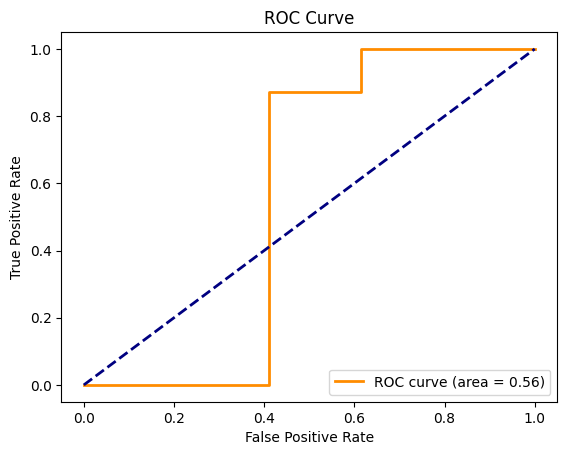

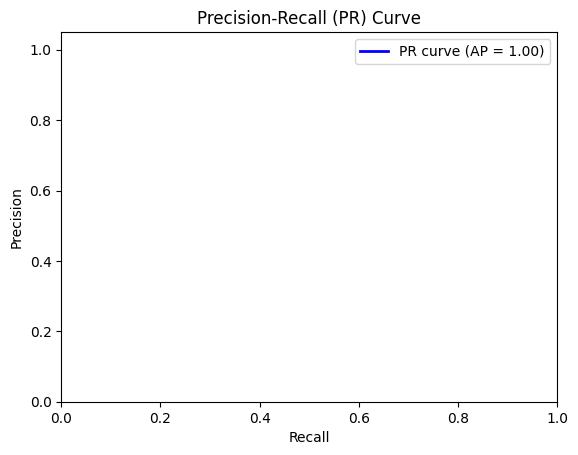

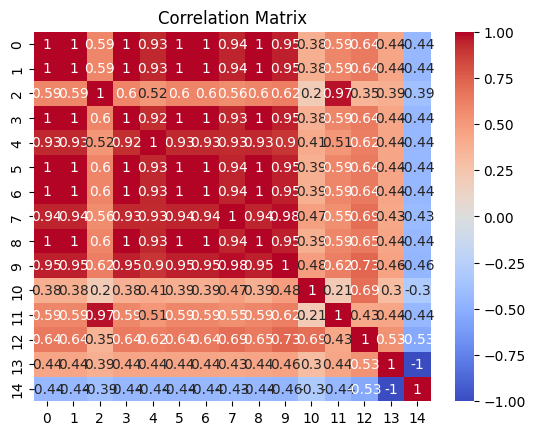

Confusion Matrix:
 [[39  0]
 [39  0]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix , precision_recall_curve, auc

# Load the CSV file
data = pd.read_excel('/content/drive/MyDrive/xls/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Print the number of instances in the training and validation sets
print("Number of instances in training set: {}".format(len(X_train)))
print("Number of instances in validation set: {}".format(len(X_test)))

# Create the logistic regression classifier and fit it to the training data
logreg = LogisticRegression(C=1.1,solver='saga',random_state=42)
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
f1_scor = f1_score(y_test, y_pred)
print(f'F1_Score:{f1_scor}')
recall = recall_score(y_test, y_pred)
print(f'recall:{recall}')
precision = precision_score(y_test, y_pred)
print(f'precision:{precision}')

report = classification_report(y_test, y_pred)
print(report)

# Compute the AUC and plot the ROC curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



# Plot the PR curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="upper right")
plt.show()

# # Compute the AUC and plot the ROC curve
# y_pred_proba = logreg.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)

# # Compute the precision-recall curve and plot it
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# pr_auc = auc(recall, precision)

# plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('ROC and PR Curves')
# plt.legend(loc="lower left")
# plt.show()

# Print the correlation matrix
corr_matrix = np.corrcoef(X_train, rowvar=False)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/xls/raw_independent_set_AA9_Final.csv')

X_inde = data.iloc[:, :-1].values
y_inde = data.iloc[:, -1].values


X_inde_test_scaled = scaler.transform(X_inde)

Y_pred = svm_classifier.predict(X_inde_test_scaled)


accuracy = accuracy_score(y_inde, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
report = classification_report(y_inde, Y_pred)
print(report)

Random forest

Number of instances in training set: 116
Number of instances in validation set: 78
Accuracy: 98.72%
F1_Score:0.9873417721518987
recall:1.0
precision:0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.97      1.00      0.99        39

    accuracy                           0.99        78
   macro avg       0.99      0.99      0.99        78
weighted avg       0.99      0.99      0.99        78



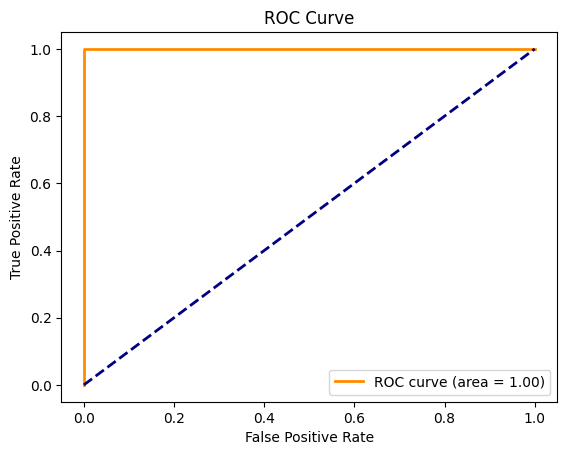

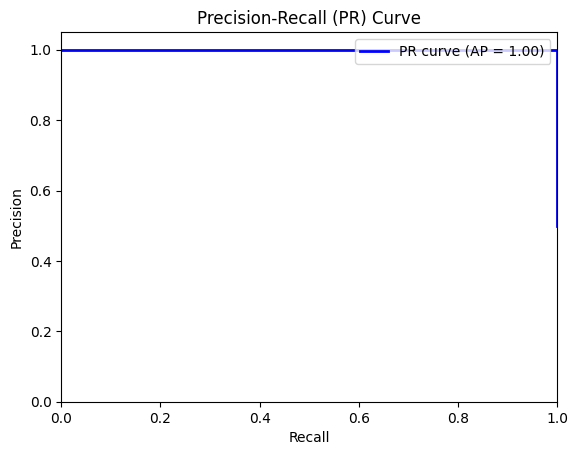

Confusion Matrix:
 [[38  1]
 [ 0 39]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc, confusion_matrix , average_precision_score

# Load the CSV file
data = pd.read_excel('/content/drive/MyDrive/xls/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Print the number of instances in the training and validation sets
print("Number of instances in training set: {}".format(len(X_train)))
print("Number of instances in validation set: {}".format(len(X_test)))

# Create the random forest classifier and fit it to the training data
rf = RandomForestClassifier(n_estimators=30,random_state=42)
rf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
f1_scor = f1_score(y_test, y_pred)
print(f'F1_Score:{f1_scor}')
recall = recall_score(y_test, y_pred)
print(f'recall:{recall}')
precision = precision_score(y_test, y_pred)
print(f'precision:{precision}')



report = classification_report(y_test, y_pred)
print(report)

# Compute the AUC and plot the ROC curve
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)

# Compute the precision-recall curve and plot it
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



# Plot the PR curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc="upper right")
plt.show()


# plt.plot(recall, precision, color='blue', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('ROC and PR Curves')
# plt.legend(loc="lower left")
# plt.show()

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


LSTM

Epoch 1/50
5/5 [==============================] - 13s 1s/step - loss: 0.6942 - accuracy: 0.5097 - val_loss: 0.6937 - val_accuracy: 0.4615
Epoch 2/50
5/5 [==============================] - 0s 50ms/step - loss: 0.6934 - accuracy: 0.5097 - val_loss: 0.6944 - val_accuracy: 0.4615
Epoch 3/50
5/5 [==============================] - 0s 58ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6946 - val_accuracy: 0.4615
Epoch 4/50
5/5 [==============================] - 0s 64ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6948 - val_accuracy: 0.4615
Epoch 5/50
5/5 [==============================] - 0s 46ms/step - loss: 0.6932 - accuracy: 0.5097 - val_loss: 0.6957 - val_accuracy: 0.4615
Epoch 6/50
5/5 [==============================] - 0s 44ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6955 - val_accuracy: 0.4615
Epoch 7/50
5/5 [==============================] - 0s 47ms/step - loss: 0.6932 - accuracy: 0.5097 - val_loss: 0.6951 - val_accuracy: 0.4615
Epoch 8/50
5/5 [============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


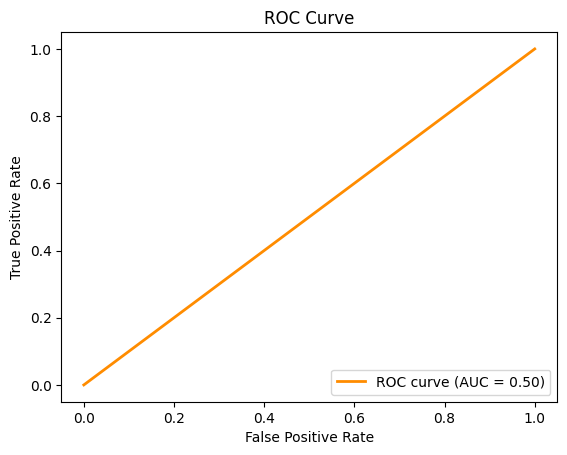

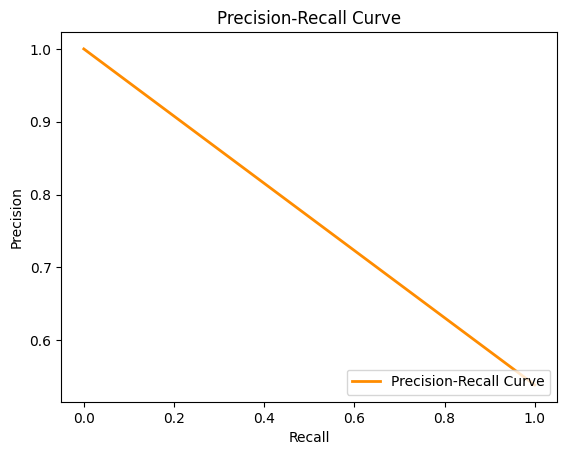

Confusion Matrix:
 [[18  0]
 [21  0]]


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the CSV file
data = pd.read_excel('/content/drive/MyDrive/majorxls/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to be 3-dimensional for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))

# Make predictions on the test set and compute the classification report
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
report = classification_report(y_test, y_pred)
print(report)

# Compute the AUC and plot the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Compute and plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

NN

Epoch 1/50
5/5 [==============================] - 3s 214ms/step - loss: 424.4402 - accuracy: 0.5097 - val_loss: 20.8852 - val_accuracy: 0.4615
Epoch 2/50
5/5 [==============================] - 0s 23ms/step - loss: 171.5069 - accuracy: 0.4258 - val_loss: 161.6960 - val_accuracy: 0.5385
Epoch 3/50
5/5 [==============================] - 0s 25ms/step - loss: 72.3360 - accuracy: 0.5484 - val_loss: 149.7483 - val_accuracy: 0.4615
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 144.2369 - accuracy: 0.5097 - val_loss: 133.4966 - val_accuracy: 0.4615
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 56.7448 - accuracy: 0.5806 - val_loss: 71.1040 - val_accuracy: 0.5385
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 73.5691 - accuracy: 0.4903 - val_loss: 14.8852 - val_accuracy: 0.4615
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 42.2116 - accuracy: 0.5097 - val_loss: 44.2317 - val_accuracy: 0.4615
Epoch 

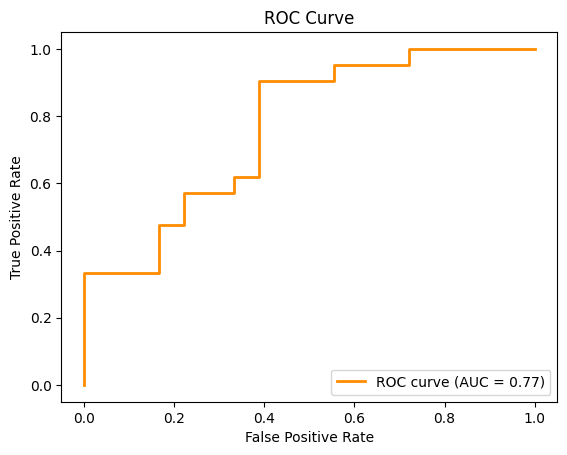

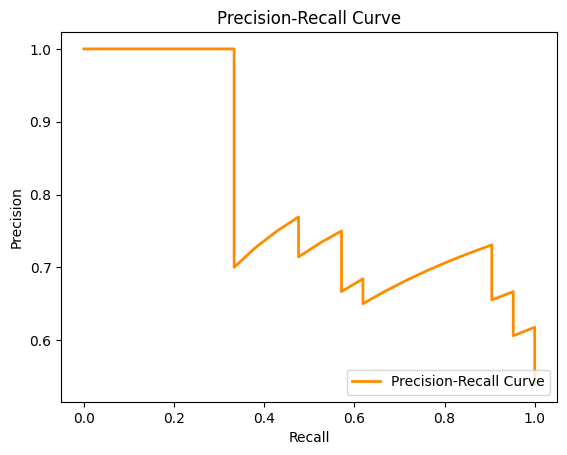

Confusion Matrix:
 [[11  7]
 [ 2 19]]


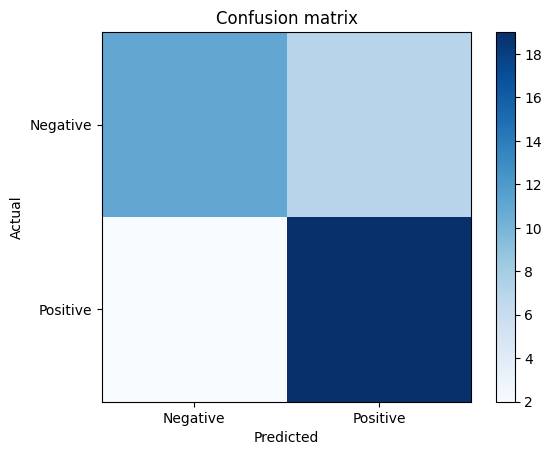

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_excel('/content/drive/MyDrive/xls/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))

# Make predictions on the test set and compute the classification report
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
report = classification_report(y_test, y_pred)
print(report)

# Compute the AUC and plot the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Compute and plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1], ['Negative', 'Positive'])
plt.yticks([0,1], ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix:
 [[17  1]
 [16  5]]


Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.54      1.00      0.70        21

    accuracy                           0.54        39
   macro avg       0.27      0.50      0.35        39
weighted avg       0.29      0.54      0.38        39



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


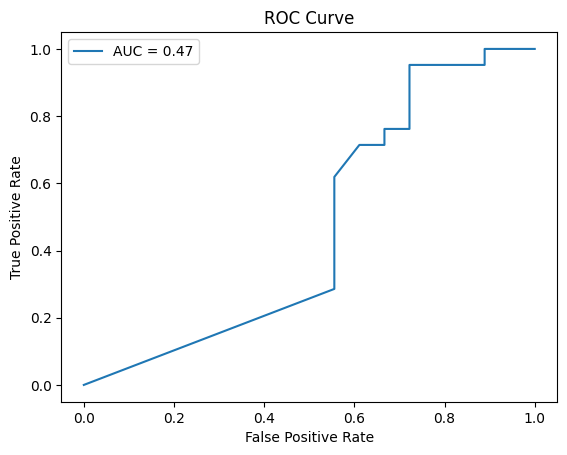

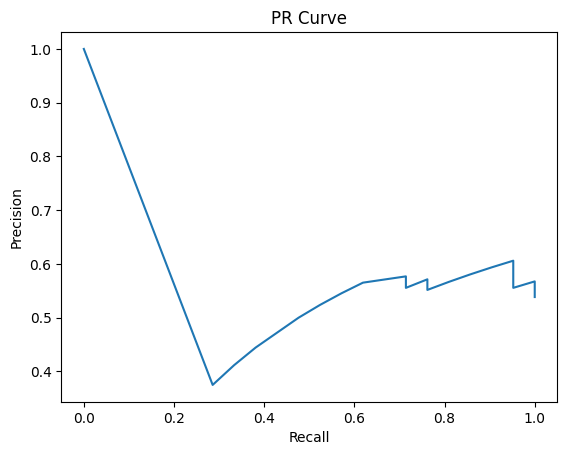

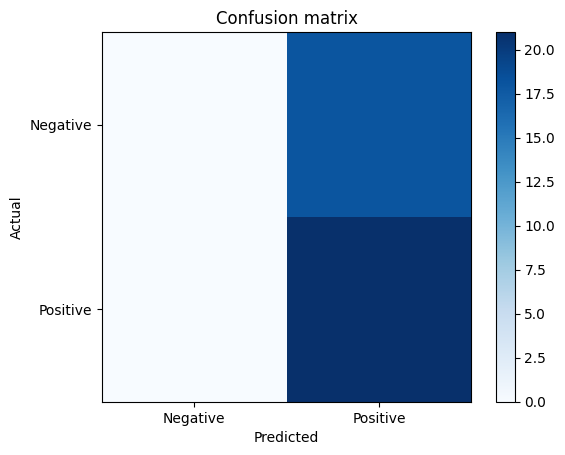

Confusion Matrix:
 [[ 0 18]
 [ 0 21]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_excel('/content/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network model
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy and classification report
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Plot AUC-ROC curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1], ['Negative', 'Positive'])
plt.yticks([0,1], ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 83.33%
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        39
           1       0.80      0.90      0.84        39

    accuracy                           0.83        78
   macro avg       0.84      0.83      0.83        78
weighted avg       0.84      0.83      0.83        78



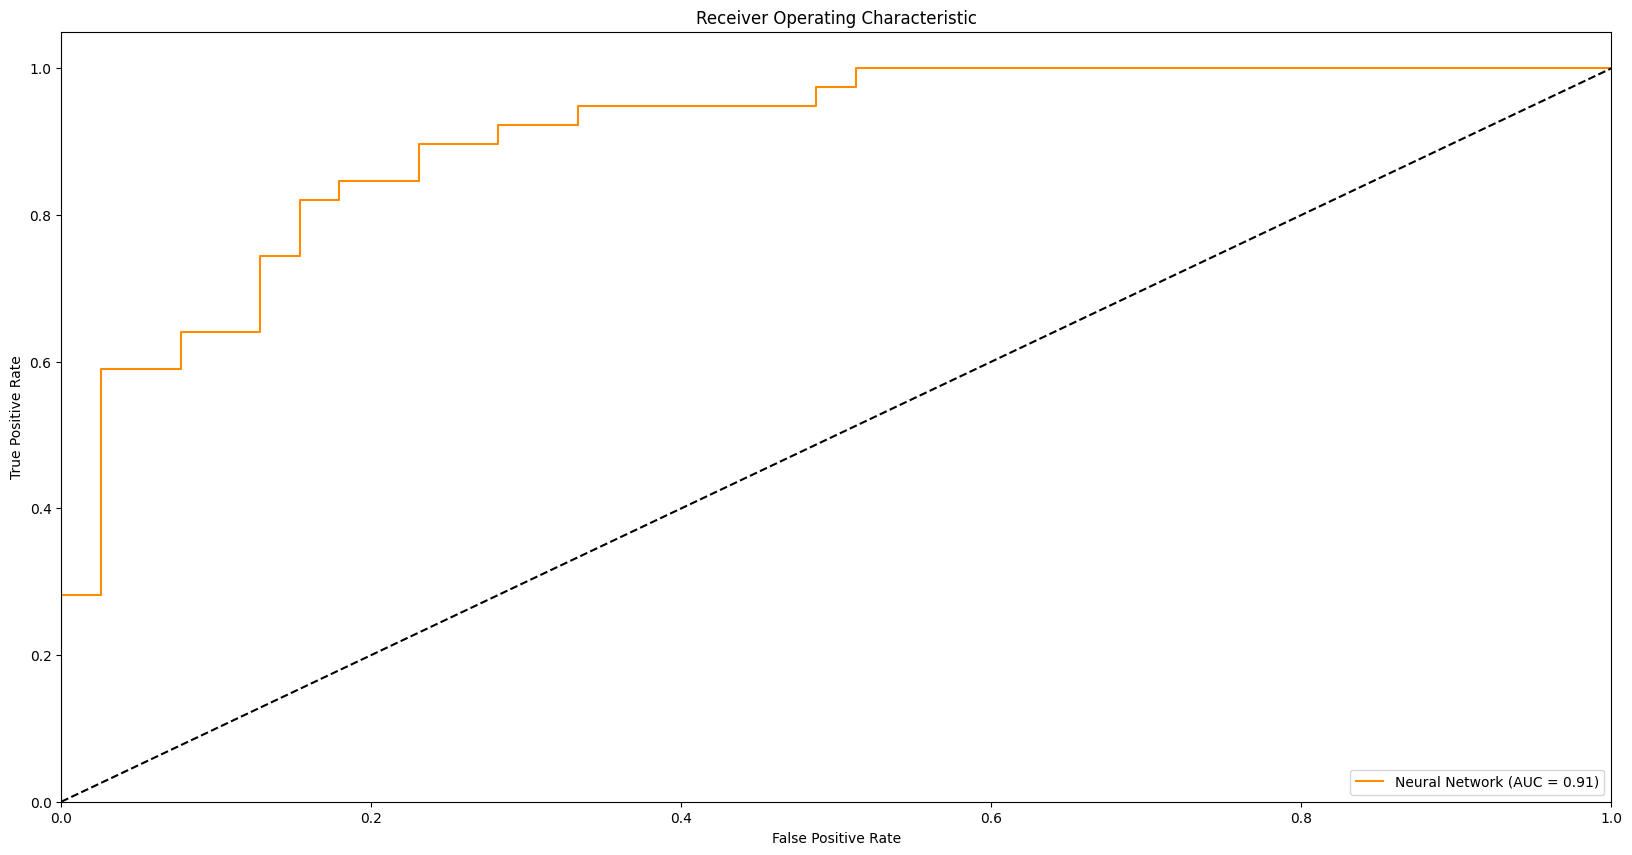

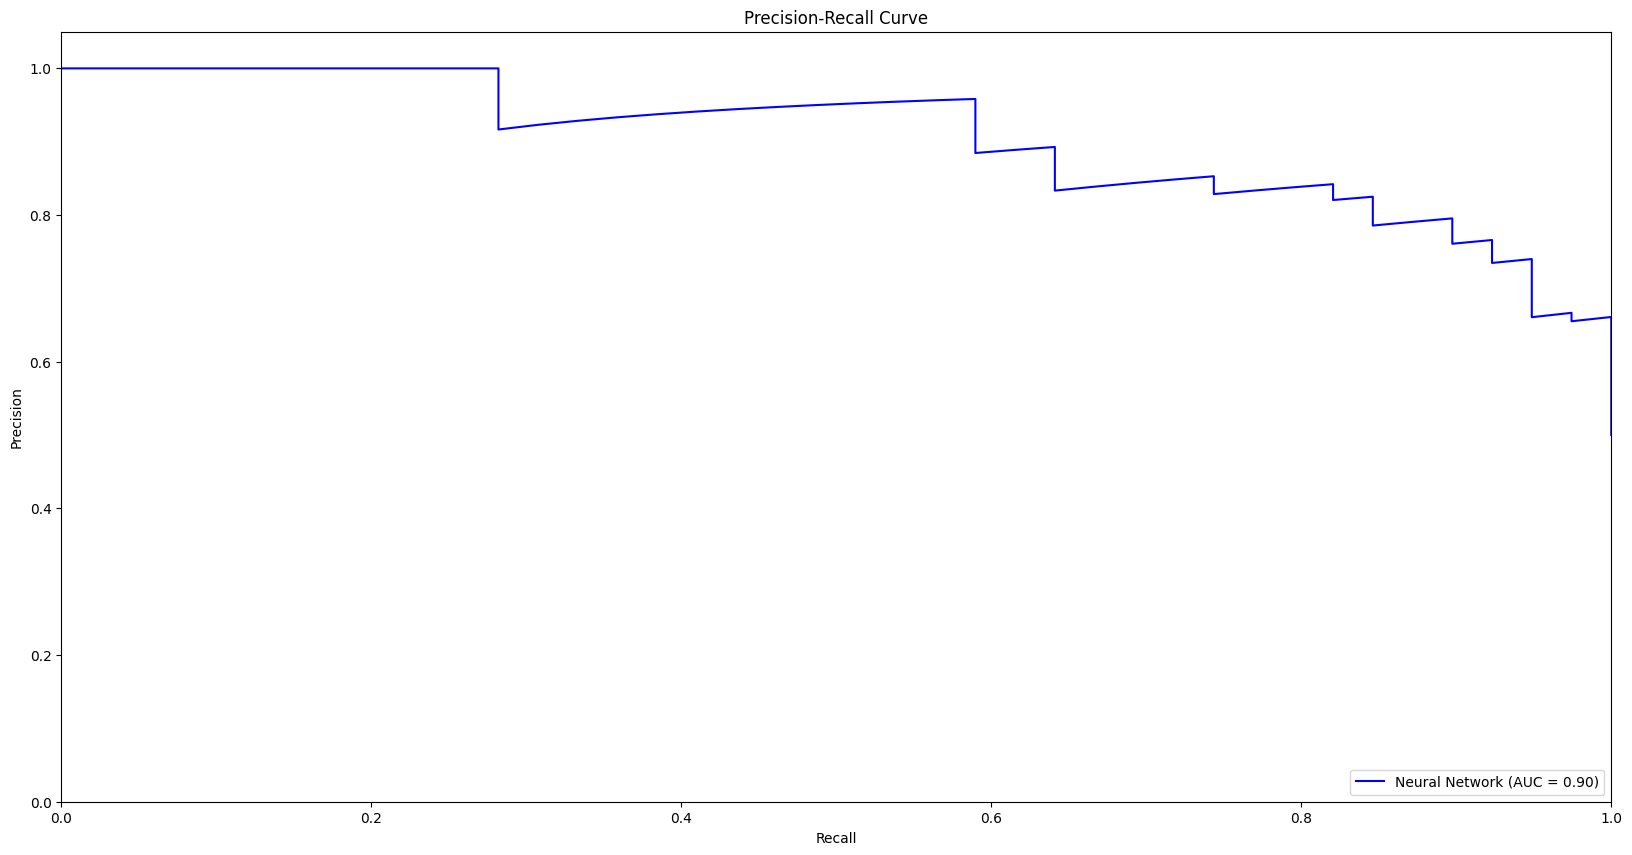

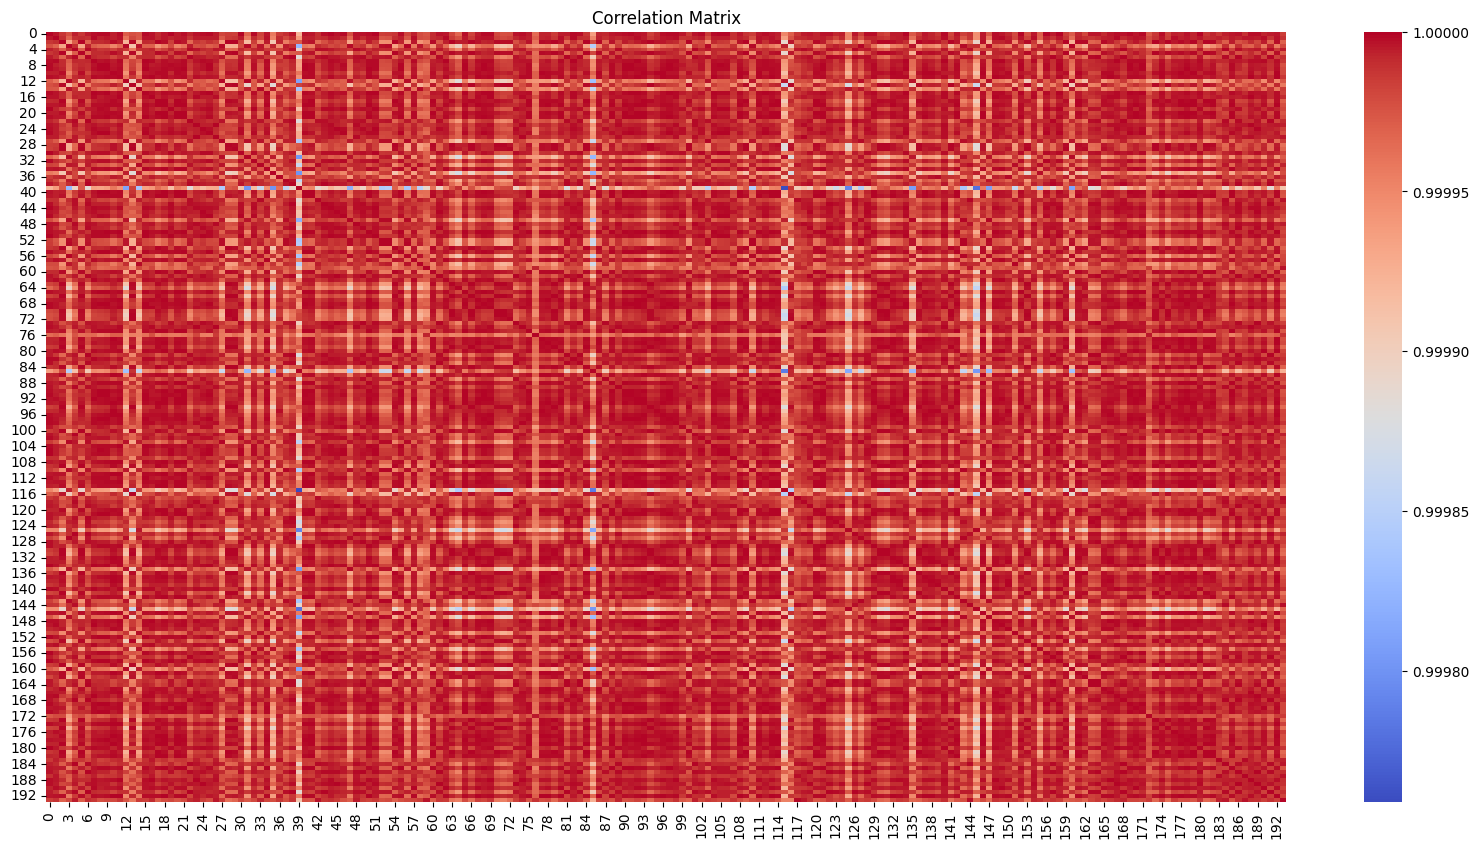

Confusion Matrix:
 [[30  9]
 [ 4 35]]


In [ ]:
#@title Default title text
activation1 = "tanh" #@param {type:"string"}
solver1 = "adam" #@param {type:"string"}
alpha1 = 0.011 #@param {type:"number"}
learning_rate1 = 0.001 #@param {type:"number"}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc,confusion_matrix
import seaborn as sns

# Load the dataset from a CSV file (replace 'your_data.csv' with the name of your CSV file)
data = pd.read_excel('/content/drive/MyDrive/xls/Final_feature.xlsx')

# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess the data by standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Multi-Layer Perceptron (Neural Network) classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation=activation1
                              ,solver = solver1, random_state=90,alpha=alpha1,learning_rate_init=learning_rate1)

# Train the classifier
nn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_proba = nn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate the Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

y_pred = (y_pred_proba > 0.5).astype(int)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


report = classification_report(y_test, y_pred)
print(report)

# Plot the ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Neural Network (AUC = %0.2f)' % roc_auc, color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(20,10))
plt.plot(recall, precision, label='Neural Network (AUC = %0.2f)' % pr_auc, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


plt.figure(figsize=(20,10))
corr_matrix = np.corrcoef(X_test, X_train)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



y_pred = (y_pred_proba > 0.5).astype(int)
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


# plt.imshow(cm, cmap='Blues')
# plt.title('Confusion matrix')
# plt.colorbar()
# plt.xticks([0,1], ['Negative', 'Positive'])
# plt.yticks([0,1], ['Negative', 'Positive'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/xls/raw_independent_set_AA9_Final.csv')

X_inde = data.iloc[:, :-1].values
y_inde = data.iloc[:, -1].values


X_inde_test_scaled = scaler.transform(X_inde)

# Y_pred = svm_classifier.predict(X_inde_test_scaled)


Y_pred_prov = nn_classifier.predict_proba(X_inde_test_scaled)[:, 1]
Y_pred = (Y_pred_prov > 0.5).astype(int)

accuracy = accuracy_score(y_inde, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
report = classification_report(y_inde, Y_pred)
print(report)

Accuracy: 41.02%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.41      0.58       729

    accuracy                           0.41       729
   macro avg       0.50      0.21      0.29       729
weighted avg       1.00      0.41      0.58       729



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
